In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!ls "/content/drive/MyDrive/bangla_image_captioning_model_002"

captions1.txt  images


In [3]:
import numpy as np
import pandas as pd
import cv2
import os
from glob import glob

In [4]:
images_path = '/content/drive/MyDrive/bangla_image_captioning_model_002/images/'
images = glob(images_path+'*.jpg')
print(len(images))
for i in images:
  print(i)

1202
/content/drive/MyDrive/bangla_image_captioning_model_002/images/image_392.jpg
/content/drive/MyDrive/bangla_image_captioning_model_002/images/image_393.jpg
/content/drive/MyDrive/bangla_image_captioning_model_002/images/image_394.jpg
/content/drive/MyDrive/bangla_image_captioning_model_002/images/image_395.jpg
/content/drive/MyDrive/bangla_image_captioning_model_002/images/image_396.jpg
/content/drive/MyDrive/bangla_image_captioning_model_002/images/image_397.jpg
/content/drive/MyDrive/bangla_image_captioning_model_002/images/image_399.jpg
/content/drive/MyDrive/bangla_image_captioning_model_002/images/image_398.jpg
/content/drive/MyDrive/bangla_image_captioning_model_002/images/image_400.jpg
/content/drive/MyDrive/bangla_image_captioning_model_002/images/image_401.jpg
/content/drive/MyDrive/bangla_image_captioning_model_002/images/image_402.jpg
/content/drive/MyDrive/bangla_image_captioning_model_002/images/image_403.jpg
/content/drive/MyDrive/bangla_image_captioning_model_002/im

In [5]:
images[:5]

['/content/drive/MyDrive/bangla_image_captioning_model_002/images/image_392.jpg',
 '/content/drive/MyDrive/bangla_image_captioning_model_002/images/image_393.jpg',
 '/content/drive/MyDrive/bangla_image_captioning_model_002/images/image_394.jpg',
 '/content/drive/MyDrive/bangla_image_captioning_model_002/images/image_395.jpg',
 '/content/drive/MyDrive/bangla_image_captioning_model_002/images/image_396.jpg']

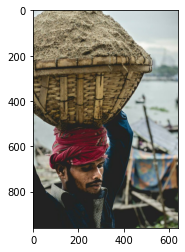

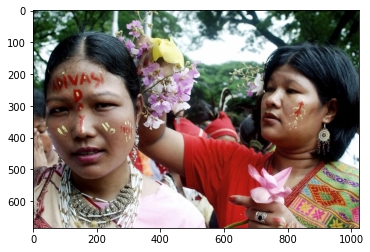

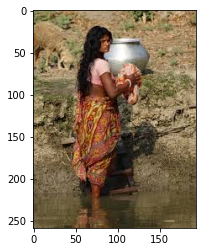

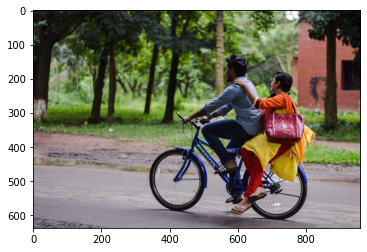

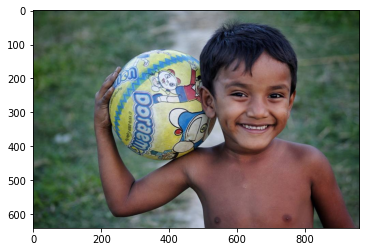

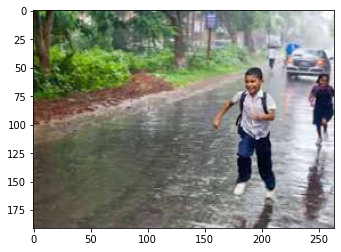

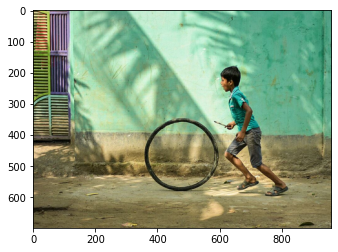

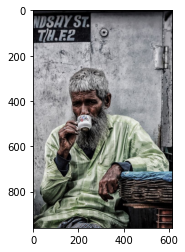

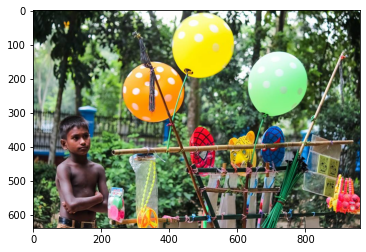

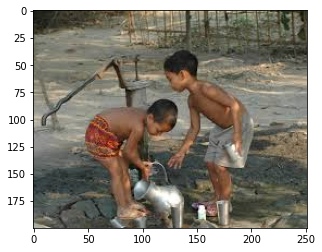

In [6]:
import matplotlib.pyplot as plt

for i in range(10):
    plt.figure()
    img = cv2.imread(images[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

In [7]:
!pip install resnet

  Created wheel for resnet: filename=resnet-0.1-py3-none-any.whl size=10041 sha256=cb351614c42ed5a3cc468d4f04017df56a27e035476567a6b4010fc2814cd376
  Stored in directory: /root/.cache/pip/wheels/38/23/58/6e83e34ced7d4772b88e2e86305f94a1ca497bd87937f5e7ec
Successfully built resnet


In [8]:
from keras.applications.resnet import ResNet50

incept_model = ResNet50(include_top=True)
incept_model.summary()

102981632/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                        

In [9]:
from keras.models import Model
last = incept_model.layers[-2].output
modele = Model(inputs = incept_model.input,outputs = last)
modele.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [10]:
images_features = {}
count = 0
for i in images:
    img = cv2.imread(i)
    print(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224,224))
    
    img = img.reshape(1,224,224,3)
    pred = modele.predict(img).reshape(2048,)
        
    img_name = i.split('/')[-1]
    
    images_features[img_name] = pred
    
    count += 1
    
    if count > 1240:
        break
        
    elif count % 100 == 0:
        print(count)
    

/content/drive/MyDrive/bangla_image_captioning_model_002/images/image_392.jpg
/content/drive/MyDrive/bangla_image_captioning_model_002/images/image_393.jpg
/content/drive/MyDrive/bangla_image_captioning_model_002/images/image_394.jpg
/content/drive/MyDrive/bangla_image_captioning_model_002/images/image_395.jpg
/content/drive/MyDrive/bangla_image_captioning_model_002/images/image_396.jpg
/content/drive/MyDrive/bangla_image_captioning_model_002/images/image_397.jpg
/content/drive/MyDrive/bangla_image_captioning_model_002/images/image_399.jpg
/content/drive/MyDrive/bangla_image_captioning_model_002/images/image_398.jpg
/content/drive/MyDrive/bangla_image_captioning_model_002/images/image_400.jpg
/content/drive/MyDrive/bangla_image_captioning_model_002/images/image_401.jpg
/content/drive/MyDrive/bangla_image_captioning_model_002/images/image_402.jpg
/content/drive/MyDrive/bangla_image_captioning_model_002/images/image_403.jpg
/content/drive/MyDrive/bangla_image_captioning_model_002/images/

In [11]:
len(images_features)

1202

In [12]:
caption_path = "/content/drive/MyDrive/bangla_image_captioning_model_002/captions1.txt"

In [13]:
captions = open(caption_path, 'rb').read().decode('utf-8').split('\n')

In [14]:
captions

['image,caption\r',
 'image_1.jpg,সাদা শার্ট পরা একলোক বৗঠা ধরে নৌকার উপর বসে আছে ।\r',
 'image_1.jpg,এক মঝি নৌকায় বসে আছে ।\r',
 'image_2.jpg,গোলাপি রঙের জামা পরা জেলে নদীতে নৌকা চালাচ্ছে ।\r',
 'image_2.jpg,নীল নদীতে এক গোলাপী শার্ট পরা মাঝি দাড় বেয়ে নৌকা চালাচ্ছে ।\r',
 'image_3.jpg,হাতে বন্দুক এবং নীল কাপড় পরা হাসিমুখে একটি শিশু তাকিয়ে আছে ।\r',
 'image_3.jpg,বন্দুক নিয়ে রঙ্গীন কাপড় পড়ে একটি শিশু খেলছে ।\r',
 'image_4.jpg,দুইটি মমবাতি হাতে শোক পালন করছে যুবকটি ।\r',
 'image_4.jpg,দুইটি মমবাতি হাতে একটি ছেলে দাঁড়িয়ে আছে ।\r',
 'image_5.jpg,এক বৃদ্ধ সাদা শার্ট আর নীল লুঙ্গি পরে কাধে দুইটা ঝুড়ি নিয়ে দাঁড়িয়ে আছে ।\r',
 'image_5.jpg,এক বৃদ্ধ ঝুড়ি নিয়ে দাঁড়িয়ে আছে ।\r',
 'image_6.jpg,দুইজন কৃষক ধান ক্ষেত থেকে ধান উঠাচ্ছে ।\r',
 'image_6.jpg,দুজন লোক ধান ক্ষেতে ধান উঠাচ্ছে ।\r',
 'image_7.jpg,এক মেয়ে শিশু কমলা রঙের কাপড় পরে হাসি মুখে দৌড়াচ্ছে ।\r',
 'image_7.jpg,কমলা রঙের কাপড় পরে একটি শিশু দৌড়াচ্ছে ।\r',
 'image_8.jpg,নীল ও হলুদ গেঞ্জিতে দুইটি লোক নৌকায় বসে আছে পাশে গাছপালা ।\r',
 'image

In [15]:
len(captions)

2440

In [16]:
captions_dict = {}
for i in captions:
    try:
        img_name = i.split(',')[0][:] 
        caption = i.split(',')[1]
        if img_name in images_features:
            if img_name not in captions_dict:
                captions_dict[img_name] = [caption]
                
            else:
                captions_dict[img_name].append(caption)
            
    except:
        pass

In [17]:
captions_dict

{'image_1.jpg': ['সাদা শার্ট পরা একলোক বৗঠা ধরে নৌকার উপর বসে আছে ।\r',
  'এক মঝি নৌকায় বসে আছে ।\r'],
 'image_2.jpg': ['গোলাপি রঙের জামা পরা জেলে নদীতে নৌকা চালাচ্ছে ।\r',
  'নীল নদীতে এক গোলাপী শার্ট পরা মাঝি দাড় বেয়ে নৌকা চালাচ্ছে ।\r'],
 'image_3.jpg': ['হাতে বন্দুক এবং নীল কাপড় পরা হাসিমুখে একটি শিশু তাকিয়ে আছে ।\r',
  'বন্দুক নিয়ে রঙ্গীন কাপড় পড়ে একটি শিশু খেলছে ।\r'],
 'image_4.jpg': ['দুইটি মমবাতি হাতে শোক পালন করছে যুবকটি ।\r',
  'দুইটি মমবাতি হাতে একটি ছেলে দাঁড়িয়ে আছে ।\r'],
 'image_5.jpg': ['এক বৃদ্ধ সাদা শার্ট আর নীল লুঙ্গি পরে কাধে দুইটা ঝুড়ি নিয়ে দাঁড়িয়ে আছে ।\r',
  'এক বৃদ্ধ ঝুড়ি নিয়ে দাঁড়িয়ে আছে ।\r'],
 'image_6.jpg': ['দুইজন কৃষক ধান ক্ষেত থেকে ধান উঠাচ্ছে ।\r',
  'দুজন লোক ধান ক্ষেতে ধান উঠাচ্ছে ।\r'],
 'image_7.jpg': ['এক মেয়ে শিশু কমলা রঙের কাপড় পরে হাসি মুখে দৌড়াচ্ছে ।\r',
  'কমলা রঙের কাপড় পরে একটি শিশু দৌড়াচ্ছে ।\r'],
 'image_8.jpg': ['নীল ও হলুদ গেঞ্জিতে দুইটি লোক নৌকায় বসে আছে পাশে গাছপালা ।\r',
  'দুটি মানুষ নৌকায় বসে আছে ।\r'],
 'image_9.jpg': ['এক বৃদ্ধ ঝু

In [18]:
len(captions_dict)

1196

['মাথায় করে বালু নিয়ে যাচ্ছে একটি শ্রমিক ।\r', 'মাথায় বালি নিয়ে শ্রমিক ।\r']
['দুজন নারী গালে রং মেখে উৎসব পালন করছে ।\r', 'রঙীন রং এ রাঙা আদিবাসীরা ।\r']
['পুকুরে গোসল শেষে নারী ঘরে ফিরছে ।\r', 'পুকুরে গোসল শেষে নারী ঘরে ফিরছে ।\r']
['ছেলেটি মেয়েকে পিছনে নিয়ে সাইকেল চালাচ্ছে ।\r', 'সাইকেল ভ্রমণ উপভোগ করছে একটি ছেলে মেয়ে ।\r']
['বল হাতে মায়াবী শিশুটি ।\r', 'একটি ছেলে বল ধরে আছে ।\r']


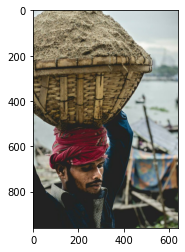

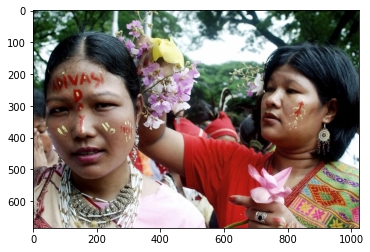

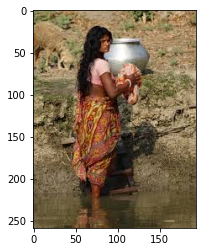

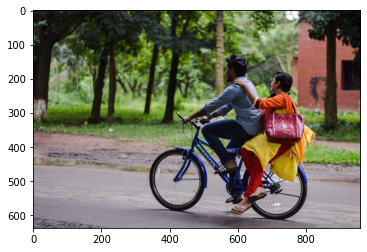

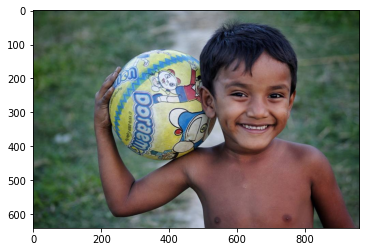

In [19]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.figure()
    img_name = images[i]
    
    
    img = cv2.imread(img_name)
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    print(captions_dict[img_name.split('/')[-1]])
    plt.imshow(img)

['মাথায় করে বালু নিয়ে যাচ্ছে একটি শ্রমিক ।\r', 'মাথায় বালি নিয়ে শ্রমিক ।\r']


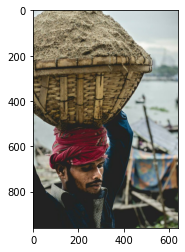

In [20]:
import matplotlib.pyplot as plt

for k in images_features.keys():
    plt.figure()
    
    img_name = '/content/drive/MyDrive/bangla_image_captioning_model_002/images/' + k
    
    
    img = cv2.imread(img_name)
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    print(captions_dict[img_name.split('/')[-1]])
    plt.imshow(img)
    
    break

In [21]:
def preprocessed(txt):
    
    modified = 'startofseq ' + txt + ' endofseq'
    return modified

In [22]:
for k,v in captions_dict.items():
    for vv in v:
        captions_dict[k][v.index(vv)] = preprocessed(vv)

In [23]:
captions_dict

{'image_1.jpg': ['startofseq সাদা শার্ট পরা একলোক বৗঠা ধরে নৌকার উপর বসে আছে ।\r endofseq',
  'startofseq এক মঝি নৌকায় বসে আছে ।\r endofseq'],
 'image_2.jpg': ['startofseq গোলাপি রঙের জামা পরা জেলে নদীতে নৌকা চালাচ্ছে ।\r endofseq',
  'startofseq নীল নদীতে এক গোলাপী শার্ট পরা মাঝি দাড় বেয়ে নৌকা চালাচ্ছে ।\r endofseq'],
 'image_3.jpg': ['startofseq হাতে বন্দুক এবং নীল কাপড় পরা হাসিমুখে একটি শিশু তাকিয়ে আছে ।\r endofseq',
  'startofseq বন্দুক নিয়ে রঙ্গীন কাপড় পড়ে একটি শিশু খেলছে ।\r endofseq'],
 'image_4.jpg': ['startofseq দুইটি মমবাতি হাতে শোক পালন করছে যুবকটি ।\r endofseq',
  'startofseq দুইটি মমবাতি হাতে একটি ছেলে দাঁড়িয়ে আছে ।\r endofseq'],
 'image_5.jpg': ['startofseq এক বৃদ্ধ সাদা শার্ট আর নীল লুঙ্গি পরে কাধে দুইটা ঝুড়ি নিয়ে দাঁড়িয়ে আছে ।\r endofseq',
  'startofseq এক বৃদ্ধ ঝুড়ি নিয়ে দাঁড়িয়ে আছে ।\r endofseq'],
 'image_6.jpg': ['startofseq দুইজন কৃষক ধান ক্ষেত থেকে ধান উঠাচ্ছে ।\r endofseq',
  'startofseq দুজন লোক ধান ক্ষেতে ধান উঠাচ্ছে ।\r endofseq'],
 'image_7.jpg': ['startofseq 

In [24]:
count_words = {}
for k,vv in captions_dict.items():
    for v in vv:
        for word in v.split():
            if word not in count_words:

                count_words[word] = 0

            else:
                count_words[word] += 1

In [25]:
len(count_words)

2379

In [26]:
count_words

{'startofseq': 2389,
 'সাদা': 77,
 'শার্ট': 21,
 'পরা': 218,
 'একলোক': 0,
 'বৗঠা': 0,
 'ধরে': 59,
 'নৌকার': 8,
 'উপর': 74,
 'বসে': 273,
 'আছে': 509,
 '।': 2387,
 'endofseq': 2389,
 'এক': 126,
 'মঝি': 0,
 'নৌকায়': 1,
 'গোলাপি': 7,
 'রঙের': 47,
 'জামা': 69,
 'জেলে': 7,
 'নদীতে': 32,
 'নৌকা': 42,
 'চালাচ্ছে': 31,
 'নীল': 48,
 'গোলাপী': 0,
 'মাঝি': 9,
 'দাড়': 0,
 'বেয়ে': 1,
 'হাতে': 151,
 'বন্দুক': 1,
 'এবং': 126,
 'কাপড়': 11,
 'হাসিমুখে': 8,
 'একটি': 829,
 'শিশু': 149,
 'তাকিয়ে': 28,
 'নিয়ে': 91,
 'রঙ্গীন': 7,
 'পড়ে': 3,
 'খেলছে': 62,
 'দুইটি': 21,
 'মমবাতি': 3,
 'শোক': 0,
 'পালন': 1,
 'করছে': 303,
 'যুবকটি': 14,
 'ছেলে': 209,
 'দাঁড়িয়ে': 39,
 'বৃদ্ধ': 48,
 'আর': 16,
 'লুঙ্গি': 7,
 'পরে': 31,
 'কাধে': 4,
 'দুইটা': 0,
 'ঝুড়ি': 10,
 'দুইজন': 15,
 'কৃষক': 9,
 'ধান': 37,
 'ক্ষেত': 2,
 'থেকে': 66,
 'উঠাচ্ছে': 2,
 'দুজন': 35,
 'লোক': 235,
 'ক্ষেতে': 8,
 'মেয়ে': 23,
 'কমলা': 16,
 'হাসি': 15,
 'মুখে': 25,
 'দৌড়াচ্ছে': 5,
 'ও': 49,
 'হলুদ': 32,
 'গেঞ্জিতে': 0,
 'পাশে': 111,
 'গাছপালা': 3,
 'দুটি':

In [27]:
THRESH = -1
count = 1
new_dict = {}
for k,v in count_words.items():
    if count_words[k] > THRESH:
        new_dict[k] = count
        count += 1

In [28]:
len(new_dict)

2379

In [29]:
new_dict['<OUT>'] = len(new_dict) 

In [30]:
captions_backup = captions_dict.copy()

In [31]:
captions_dict = captions_backup.copy()

In [32]:
for k, vv in captions_dict.items():
    for v in vv:
        encoded = []
        for word in v.split():  
           encoded.append(new_dict[word])


        captions_dict[k][vv.index(v)] = encoded

In [33]:
captions_dict

{'image_1.jpg': [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
  [1, 14, 15, 16, 10, 11, 12, 13]],
 'image_2.jpg': [[1, 17, 18, 19, 4, 20, 21, 22, 23, 12, 13],
  [1, 24, 21, 14, 25, 3, 4, 26, 27, 28, 22, 23, 12, 13]],
 'image_3.jpg': [[1, 29, 30, 31, 24, 32, 4, 33, 34, 35, 36, 11, 12, 13],
  [1, 30, 37, 38, 32, 39, 34, 35, 40, 12, 13]],
 'image_4.jpg': [[1, 41, 42, 29, 43, 44, 45, 46, 12, 13],
  [1, 41, 42, 29, 34, 47, 48, 11, 12, 13]],
 'image_5.jpg': [[1,
   14,
   49,
   2,
   3,
   50,
   24,
   51,
   52,
   53,
   54,
   55,
   37,
   48,
   11,
   12,
   13],
  [1, 14, 49, 55, 37, 48, 11, 12, 13]],
 'image_6.jpg': [[1, 56, 57, 58, 59, 60, 58, 61, 12, 13],
  [1, 62, 63, 58, 64, 58, 61, 12, 13]],
 'image_7.jpg': [[1, 14, 65, 35, 66, 18, 32, 52, 67, 68, 69, 12, 13],
  [1, 66, 18, 32, 52, 34, 35, 69, 12, 13]],
 'image_8.jpg': [[1, 24, 70, 71, 72, 41, 63, 16, 10, 11, 73, 74, 12, 13],
  [1, 75, 76, 77, 10, 11, 12, 13]],
 'image_9.jpg': [[1, 14, 49, 55, 71, 78, 37, 10, 11, 12, 13],
  [1

In [34]:
import keras
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences

In [35]:
MAX_LEN = 0
for k, vv in captions_dict.items():
    for v in vv:
        if len(v) > MAX_LEN:
            MAX_LEN = len(v)
            print(v)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
[1, 24, 21, 14, 25, 3, 4, 26, 27, 28, 22, 23, 12, 13]
[1, 14, 49, 2, 3, 50, 24, 51, 52, 53, 54, 55, 37, 48, 11, 12, 13]
[1, 38, 19, 4, 31, 87, 88, 4, 89, 55, 60, 90, 91, 31, 73, 87, 88, 4, 34, 92, 11, 12, 13]
[1, 272, 50, 191, 332, 134, 333, 334, 275, 335, 50, 336, 337, 338, 245, 129, 68, 67, 37, 339, 340, 191, 341, 342, 343, 12, 13]
[1, 34, 47, 35, 141, 142, 93, 295, 52, 358, 41, 284, 37, 247, 107, 359, 2, 168, 31, 413, 295, 4, 47, 35, 87, 34, 284, 37, 11, 12, 13]


In [36]:
MAX_LEN

31

In [37]:
captions_dict

{'image_1.jpg': [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
  [1, 14, 15, 16, 10, 11, 12, 13]],
 'image_2.jpg': [[1, 17, 18, 19, 4, 20, 21, 22, 23, 12, 13],
  [1, 24, 21, 14, 25, 3, 4, 26, 27, 28, 22, 23, 12, 13]],
 'image_3.jpg': [[1, 29, 30, 31, 24, 32, 4, 33, 34, 35, 36, 11, 12, 13],
  [1, 30, 37, 38, 32, 39, 34, 35, 40, 12, 13]],
 'image_4.jpg': [[1, 41, 42, 29, 43, 44, 45, 46, 12, 13],
  [1, 41, 42, 29, 34, 47, 48, 11, 12, 13]],
 'image_5.jpg': [[1,
   14,
   49,
   2,
   3,
   50,
   24,
   51,
   52,
   53,
   54,
   55,
   37,
   48,
   11,
   12,
   13],
  [1, 14, 49, 55, 37, 48, 11, 12, 13]],
 'image_6.jpg': [[1, 56, 57, 58, 59, 60, 58, 61, 12, 13],
  [1, 62, 63, 58, 64, 58, 61, 12, 13]],
 'image_7.jpg': [[1, 14, 65, 35, 66, 18, 32, 52, 67, 68, 69, 12, 13],
  [1, 66, 18, 32, 52, 34, 35, 69, 12, 13]],
 'image_8.jpg': [[1, 24, 70, 71, 72, 41, 63, 16, 10, 11, 73, 74, 12, 13],
  [1, 75, 76, 77, 10, 11, 12, 13]],
 'image_9.jpg': [[1, 14, 49, 55, 71, 78, 37, 10, 11, 12, 13],
  [1

In [38]:
Batch_size = 2000
VOCAB_SIZE = len(new_dict)

def generator(photo, caption):
    n_samples = 0
    
    X = []
    y_in = []
    y_out = []
    
    for k, vv in caption.items():
        for v in vv:
            for i in range(1, len(v)):
                X.append(photo[k])

                in_seq= [v[:i]]
                out_seq = v[i]

                in_seq = pad_sequences(in_seq, maxlen=MAX_LEN, padding='post', truncating='post')[0]
                out_seq = to_categorical([out_seq], num_classes=VOCAB_SIZE)[0]

                y_in.append(in_seq)
                y_out.append(out_seq)
            
    return X, y_in, y_out

In [39]:
X, y_in, y_out = generator(images_features, captions_dict)

In [40]:
len(X), len(y_in), len(y_out)

(21379, 21379, 21379)

In [41]:
X = np.array(X)
y_in = np.array(y_in, dtype='float64')
y_out = np.array(y_out, dtype='float64')

In [42]:
X.shape, y_in.shape, y_out.shape

((21379, 2048), (21379, 31), (21379, 2380))

In [43]:
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras.models import Model, Sequential
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate
from keras.models import Sequential, Model

In [44]:
embedding_size = 128
max_len = MAX_LEN
vocab_size = len(new_dict)

image_model = Sequential()

image_model.add(Dense(embedding_size, input_shape=(2048,), activation='relu'))
image_model.add(RepeatVector(max_len))

image_model.summary()

language_model = Sequential()

language_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len))
language_model.add(LSTM(256, return_sequences=True))
language_model.add(TimeDistributed(Dense(embedding_size)))

language_model.summary()

conca = Concatenate()([image_model.output, language_model.output])
x = LSTM(128, return_sequences=True)(conca)
x = LSTM(512, return_sequences=False)(x)
x = Dense(vocab_size)(x)
out = Activation('softmax')(x)
model = Model(inputs=[image_model.input, language_model.input], outputs = out)

# model.load_weights("../input/model_weights.h5")
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               262272    
                                                                 
 repeat_vector (RepeatVector  (None, 31, 128)          0         
 )                                                               
                                                                 
Total params: 262,272
Trainable params: 262,272
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 31, 128)           304640    
                                                                 
 lstm (LSTM)                 (None, 31, 256)           394240    
                            

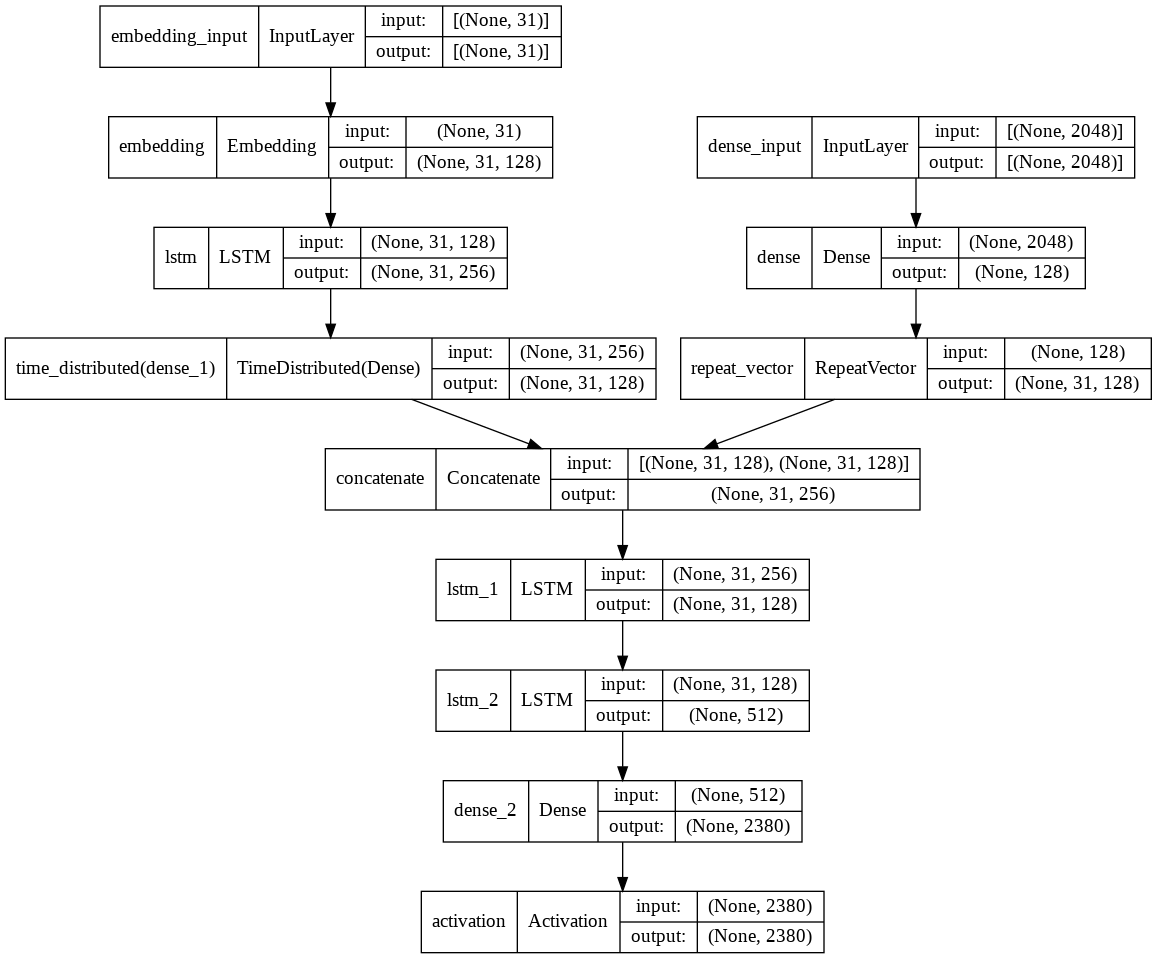

In [45]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True)

In [46]:
model.fit([X, y_in], y_out, batch_size=100, epochs=50)

Epoch 1/50
214/214 [==============================] - 21s 64ms/step - loss: 5.5934 - accuracy: 0.1671
Epoch 2/50
214/214 [==============================] - 13s 63ms/step - loss: 5.0783 - accuracy: 0.2451
Epoch 3/50
214/214 [==============================] - 13s 63ms/step - loss: 4.9069 - accuracy: 0.2519
Epoch 4/50
214/214 [==============================] - 13s 62ms/step - loss: 4.7804 - accuracy: 0.2580
Epoch 5/50
214/214 [==============================] - 13s 63ms/step - loss: 4.6805 - accuracy: 0.2637
Epoch 6/50
214/214 [==============================] - 13s 63ms/step - loss: 4.5877 - accuracy: 0.2714
Epoch 7/50
214/214 [==============================] - 13s 63ms/step - loss: 4.4818 - accuracy: 0.2843
Epoch 8/50
214/214 [==============================] - 13s 63ms/step - loss: 4.3729 - accuracy: 0.2937
Epoch 9/50
214/214 [==============================] - 13s 63ms/step - loss: 4.2578 - accuracy: 0.3020
Epoch 10/50
214/214 [==============================] - 13s 63ms/step - loss: 4.147

In [47]:
inv_dict = {v:k for k, v in new_dict.items()}

In [48]:
model.save('model_1.h5')

In [49]:
model.save_weights('mine_model_1_weights.h5')

In [50]:
np.save('vocab.npy', new_dict)

In [51]:
def getImage(x):
    
    test_img_path = images[x]

    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    test_img = cv2.resize(test_img, (224,224))

    test_img = np.reshape(test_img, (1,224,224,3))
    
    return test_img

 একটি বিড়াল বসে আছে । endofseq


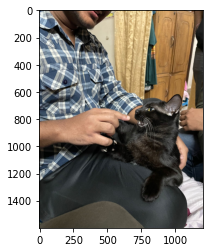

In [80]:
for i in range(1):
    
    no = np.random.randint(0,1200,(1,1))[0,0]
    test_feature = modele.predict(getImage(no)).reshape(1,2048)
    
    test_img_path = images[no]
    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)


    text_inp = ['startofseq']

    count = 0
    caption = ''
    while count < 31:
        count += 1

        encoded = []
        for i in text_inp:
            encoded.append(new_dict[i])

        encoded = [encoded]

        encoded = pad_sequences(encoded, padding='post', truncating='post', maxlen=MAX_LEN)


        prediction = np.argmax(model.predict([test_feature, encoded]))

        sampled_word = inv_dict[prediction]

        caption = caption + ' ' + sampled_word
            
        if sampled_word == 'endofseq':
            break

        text_inp.append(sampled_word)
        
    plt.figure()
    plt.imshow(test_img)
    print(caption)